<a href="https://colab.research.google.com/github/derting/ColabNote/blob/master/Kaggle_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow 學習：Fashion MNIST識別

In [0]:
import tensorflow as tf
import numpy as np
import datetime 
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib

In [0]:
tf.__version__

# T-shirt/top: 短袖圓領T恤
# Trouser: 褲子
# Pullover: 套衫
# Dress: 連衣裙
# Coat: 外套
# Sandal: 涼鞋
# Shirt: 襯衫
# Sneaker: 運動鞋
# Bag: 包
# Ankle boot: 短靴
class_names = ['T-shirt/top','Trouser','Pullover','Dress',
               'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Text(0.5, 0, 'Pullover')

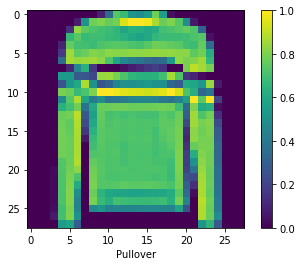

In [66]:
# 展示1張圖
idx = 5
plt.figure()
plt.imshow(X_train[idx])
plt.grid(False)
plt.colorbar()
plt.xlabel(class_names[y_train[idx]])

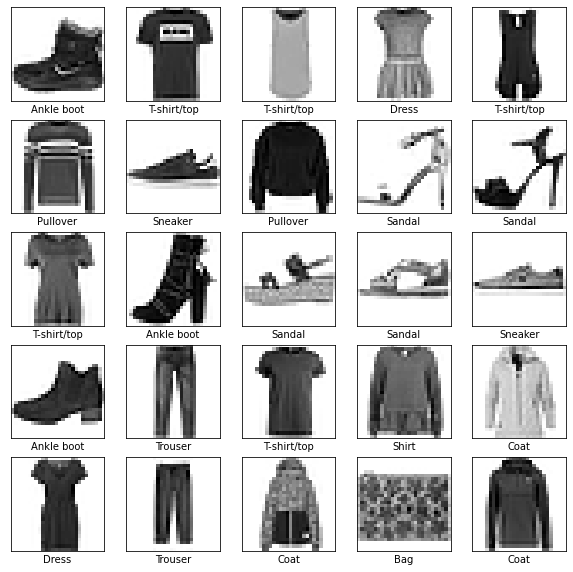

In [25]:
# 展示25張圖

# 儲存畫布的圖形，寬度為 10 ， 長度為10
plt.figure(figsize=(10,10))

# 顯示訓練集的 25 張影象
for i in range(25):
    # 建立分佈 5 * 5 個圖形
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # 顯示照片，以cm 為單位。
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [26]:
X_train = X_train.reshape(-1, 28*28)
X_train.shape


(60000, 784)

In [0]:
X_test = X_test.reshape(-1, 28*28)


建立模型 3 Layer

In [0]:
# 建立模型
def build_model():
  # 線性疊加
  model = tf.keras.models.Sequential()
  # Layer 1: 改變平緩輸入 
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  # Layer 2:第一層緊密連線128神經元
  #model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
  # Layer 3:使用Dropout正則化
  model.add(tf.keras.layers.Dropout(0.2))  
  # Layer 4:輸出分成10個類別
  #model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
  return model

In [36]:
# 編譯模型
model = build_model()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Model 訓練

In [37]:
# 訓練模型
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4961 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3761 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8913


Model 評估準確度

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8728


In [39]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8727999925613403


Ｍodel 做預測

In [40]:
predictions = model.predict(X_test)

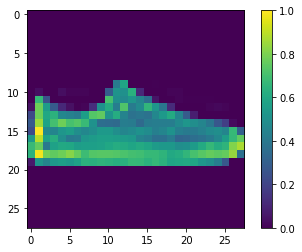

In [67]:

plt.figure()
plt.imshow(X_test[12])
plt.grid(False)
plt.colorbar()

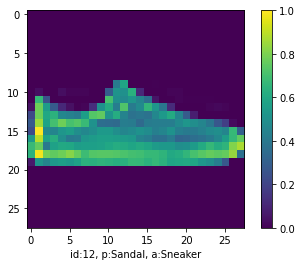

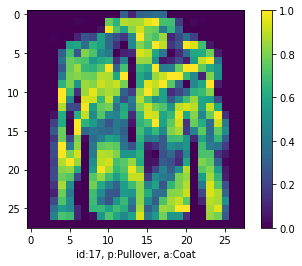

In [78]:
# 提取20個數據集，進行預測判斷是否正確
for i in range(20):
    pre = class_names[np.argmax(predictions[i])]
    tar = class_names[y_test[i]]
    if(pre != tar):
      # print(" idx: %s, 預測：%s   實際：%s" % (i, pre, tar))
      plt.figure()
      plt.imshow(X_test[i])
      plt.grid(False)
      plt.colorbar()
      plt.xlabel("id:{}, p:{}, a:{}".format( i, pre, tar, color='red'))